# 1) Imports

In [1]:
import sys
sys.path.insert(1, '/mnt/c/Users/conno/Documents/GitHub/MISTIQS/src')

from Heisenberg import Heisenberg

# 2) Create Heisenberg object
This object solely takes in your input file, so it contains the information about the system you are simulating and your preferences including backend choice, compilation method, and others.

In [2]:

#First, create the Heisenberg object using the parameters specified in the input file. This defines the system to simulate
#and allows for the generation of circuits to simulate the time evolution of this system.
test_object=Heisenberg("TFIM_input_file.txt")



#Because we are working in the IBM backend in this example, run the connect_IBM() method of the object to connect to IBM's
#backend. This is required for both compilation and circuit execution, if desired.

#First time user of IBM's Quantum Experience API? Run the line below
# test_object.connect_IBM(api_key="insert your IBM Quantum Experience API key here")

#If you already run IBM Quantum Experience API jobs, run the following instead:
test_object.connect_IBM()


    


/home/cpowers/miniconda3/envs/py38/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# 3) Generate Quantum Circuits for Quantum Simulation of Your Physical System

Note: any warning messages about gate error values are due to qiskit's noise model building, not MISTIQS

In [3]:
test_object.generate_circuits()

Generating timestep 0 circuit
Generating timestep 1 circuit
Generating timestep 2 circuit
Generating timestep 3 circuit
Generating timestep 4 circuit
Generating timestep 5 circuit
Generating timestep 6 circuit
Generating timestep 7 circuit
Generating timestep 8 circuit
Generating timestep 9 circuit
Generating timestep 10 circuit
Generating timestep 11 circuit
Generating timestep 12 circuit
Generating timestep 13 circuit
Generating timestep 14 circuit
Generating timestep 15 circuit
Generating timestep 16 circuit
Generating timestep 17 circuit
Generating timestep 18 circuit
Generating timestep 19 circuit
Generating timestep 20 circuit
Generating timestep 21 circuit
Generating timestep 22 circuit
Generating timestep 23 circuit
Generating timestep 24 circuit
Generating timestep 25 circuit
Generating timestep 26 circuit
Generating timestep 27 circuit
Generating timestep 28 circuit
Generating timestep 29 circuit
Generating timestep 30 circuit
Creating IBM quantum circuit objects...
IBM quant

# 4) Run the Quantum Circuits on Your Selected Quantum Device and Post-Process the Results

In [4]:
test_object.run_circuits()

Job Status: job has successfully run
Post-processing qubit 1 data
Post-processing qubit 2 data
Post-processing qubit 3 data
Done


In [5]:
noisyresults=test_object.results()

In [6]:
object2=Heisenberg("TFIM_input_file_clean.txt")

In [7]:
object2.generate_circuits()
object2.run_circuits()
cleanresults=object2.results()

Generating timestep 0 circuit
Generating timestep 1 circuit
Generating timestep 2 circuit
Generating timestep 3 circuit
Generating timestep 4 circuit
Generating timestep 5 circuit
Generating timestep 6 circuit
Generating timestep 7 circuit
Generating timestep 8 circuit
Generating timestep 9 circuit
Generating timestep 10 circuit
Generating timestep 11 circuit
Generating timestep 12 circuit
Generating timestep 13 circuit
Generating timestep 14 circuit
Generating timestep 15 circuit
Generating timestep 16 circuit
Generating timestep 17 circuit
Generating timestep 18 circuit
Generating timestep 19 circuit
Generating timestep 20 circuit
Generating timestep 21 circuit
Generating timestep 22 circuit
Generating timestep 23 circuit
Generating timestep 24 circuit
Generating timestep 25 circuit
Generating timestep 26 circuit
Generating timestep 27 circuit
Generating timestep 28 circuit
Generating timestep 29 circuit
Generating timestep 30 circuit
Creating IBM quantum circuit objects...
IBM quant

In [8]:
import matplotlib.pyplot as plt


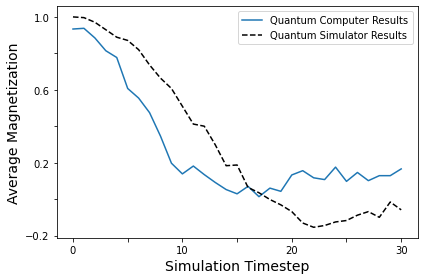

In [19]:
fig, ax = plt.subplots()
plt.plot(noisyresults[2,:])
plt.plot(cleanresults[2,:],'k--')
plt.xlabel("Simulation Timestep",fontsize=14)
plt.ylabel("Average Magnetization",fontsize=14)
plt.legend(["Quantum Computer Results","Quantum Simulator Results"])
plt.tight_layout()
every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if (n+1) % every_nth != 0:
        label.set_visible(False)
every_nth = 2
for n, label in enumerate(ax.yaxis.get_ticklabels()):
    if (n+1) % every_nth != 0:
        label.set_visible(False)